Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

Data Collection and Analysis

 Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(1193, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,4.260687,121.347024,69.374686,19.674769,81.498743,32.011065,0.464559,33.874267,0.366303
std,3.662792,30.997758,19.718095,16.299005,124.728289,7.605959,0.314426,11.792001,0.481996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.500000,0.246000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,14.000000,32.000000,0.398000,30.000000,0.000000
75%,7.000000,139.000000,80.000000,32.000000,129.000000,36.600000,0.591000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,756
1,437


In [ ]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1193 non-null   int64  
 1   Glucose                   1193 non-null   int64  
 2   BloodPressure             1193 non-null   int64  
 3   SkinThickness             1193 non-null   int64  
 4   Insulin                   1193 non-null   int64  
 5   BMI                       1193 non-null   float64
 6   DiabetesPedigreeFunction  1193 non-null   float64
 7   Age                       1193 non-null   int64  
 8   Outcome                   1193 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 84.0 KB


MAX AGE: 81
MIN AGE: 21


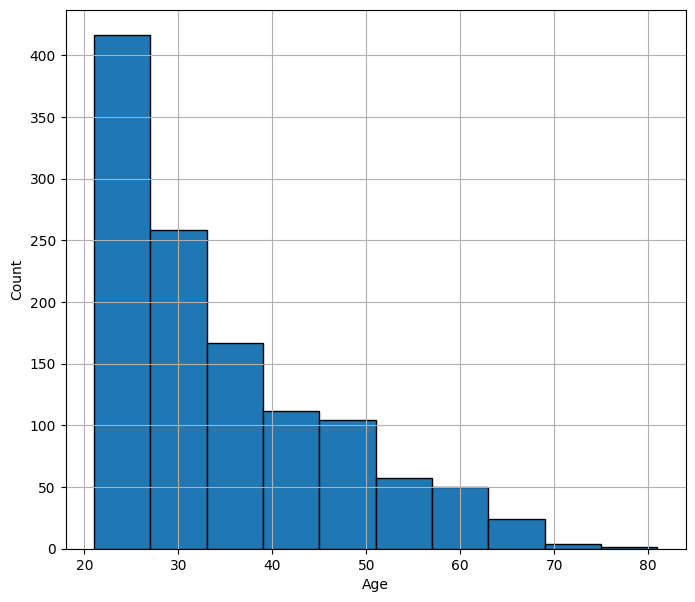

In [ ]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
diabetes_dataset['Age'].hist(edgecolor="black")
print("MAX AGE: "+str(diabetes_dataset['Age'].max()))
print("MIN AGE: "+str(diabetes_dataset['Age'].min()))

In [ ]:
diabetes_dataset.groupby("Outcome").agg({'Pregnancies':'mean'})
diabetes_dataset.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.593915,110.657407,68.779101,18.828042,65.373016,30.593254,0.426007,31.689153
1,5.414188,139.839817,70.405034,21.139588,109.395881,34.463844,0.531254,37.654462


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
1188            1      168             88             29        0  35.0   
1189            2      129              0              0        0  38.5   
1190            4      110             76             20      100  28.4   
1191            6       80             80             36        0  39.8   
1192           10      115              0              0        0   0.0   

      DiabetesPedigreeFunction  Age  
0                        0.627   50  
1                      

In [ ]:
print(Y)

0       1
1       0
2       1
3       0
4       1
       ..
1188    1
1189    0
1190    0
1191    0
1192    1
Name: Outcome, Length: 1193, dtype: int64


Text(0.5, 1.0, 'CORRELATION BETWEEN ALL FEATURES')

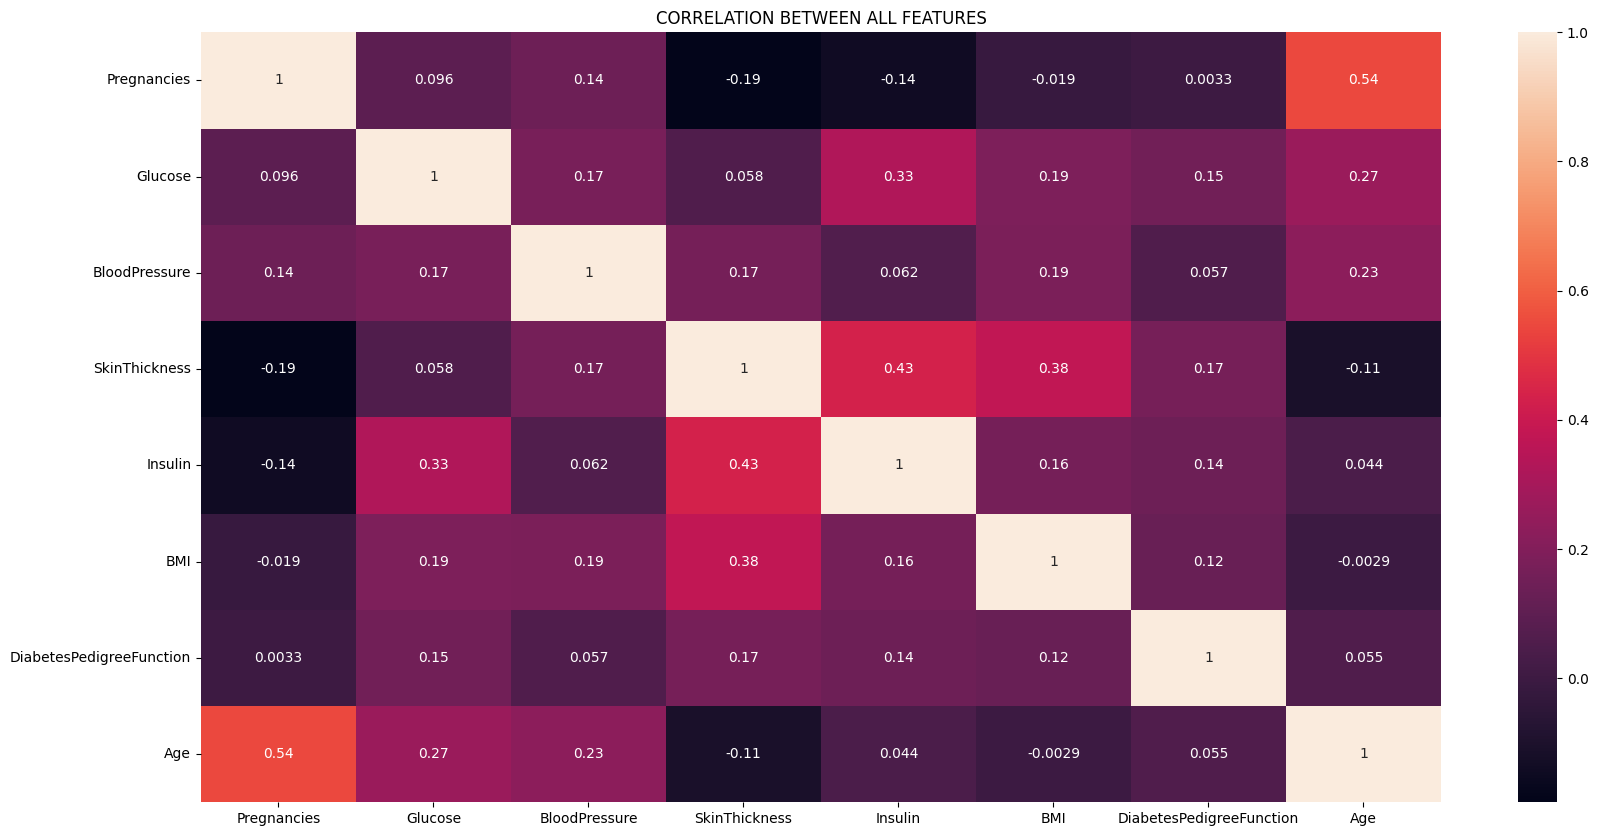

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)
plt.title('CORRELATION BETWEEN ALL FEATURES')

Spiliting in Training and Testing set


In [ ]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=2)
total_samples = len(X)
train_samples = len(X_train)
test_samples = len(X_test)
train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100
print(f"Total samples: {total_samples}")
print(f"Training samples: {train_samples} ({train_percentage:.2f}%)")
print(f"Testing samples: {test_samples} ({test_percentage:.2f}%)")


Total samples: 1193
Training samples: 954 (79.97%)
Testing samples: 239 (20.03%)


LOGISTIC REGRESSION

In [ ]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

Confusion Matrix:
[[129  22]
 [ 41  47]]


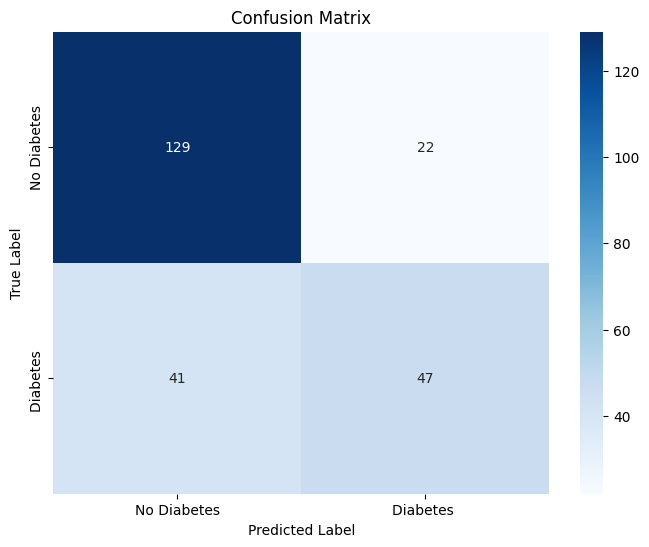

Accuracy Score: 0.74


In [ ]:
Y_pred1=log.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred1)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes '],
            yticklabels=['No Diabetes', 'Diabetes '])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy score
accuracy = accuracy_score(Y_test, Y_pred1)
print(f'Accuracy Score: {accuracy:.2f}')


In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred1)

true_negative = conf_mat[0][0]  # Correctly predicted negative class
false_positive = conf_mat[0][1] # Incorrectly predicted positive class
false_negative = conf_mat[1][0] # Incorrectly predicted negative class
true_positive = conf_mat[1][1]  # Correctly predicted positive class

# Precison
Precision = true_positive/(true_positive+false_positive)
Precision
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score
target_names = ['Diabetes_Present','Diabetes_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(Y_test,Y_pred1, target_names=target_names)))

Classification Report is: 
                       precision    recall  f1-score   support

    Diabetes_Present       0.76      0.85      0.80       151
Diabetes_Not_Present       0.68      0.53      0.60        88

            accuracy                           0.74       239
           macro avg       0.72      0.69      0.70       239
        weighted avg       0.73      0.74      0.73       239



SUPPORT VECTOR CLASSIFIER

In [ ]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,Y_train)

SVC()

Confusion Matrix:
[[138  13]
 [ 47  41]]


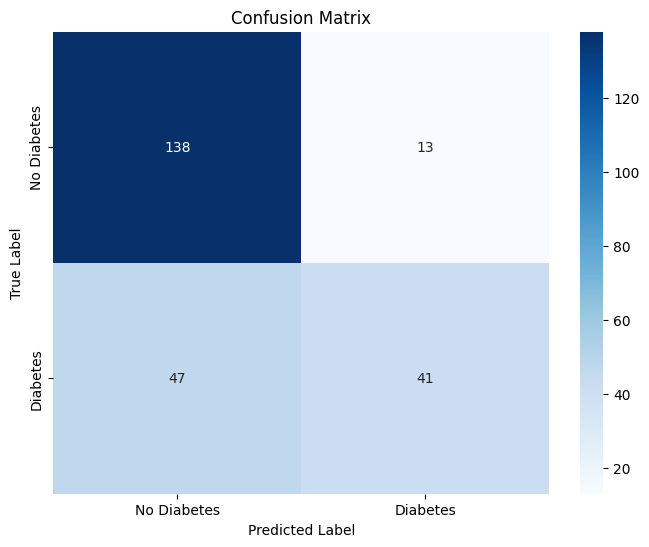

Accuracy Score: 0.75


In [ ]:
Y_pred2=svm.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred2)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy score
accuracy = accuracy_score(Y_test, Y_pred2)
print(f'Accuracy Score: {accuracy:.2f}')


In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred2)
true_negative = conf_mat[0][0]  # Correctly predicted negative class
false_positive = conf_mat[0][1] # Incorrectly predicted positive class
false_negative = conf_mat[1][0] # Incorrectly predicted negative class
true_positive = conf_mat[1][1]  # Correctly predicted positive class

# Precison
Precision = true_positive/(true_positive+false_positive)
Precision
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score
target_names = ['Diabetes_Present','Diabetes_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(Y_test,Y_pred2, target_names=target_names)))

Classification Report is: 
                       precision    recall  f1-score   support

    Diabetes_Present       0.75      0.91      0.82       151
Diabetes_Not_Present       0.76      0.47      0.58        88

            accuracy                           0.75       239
           macro avg       0.75      0.69      0.70       239
        weighted avg       0.75      0.75      0.73       239



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
#by default k=5
Y_pred3=knn.predict(X_test)
accuracy_score(Y_test,Y_pred3)

0.7907949790794979

In [ ]:
score=[]
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  Y_pred3=knn.predict(X_test)
  score.append(accuracy_score(Y_test,Y_pred3))
  print(score)

[0.8242677824267782]
[0.8242677824267782, 0.799163179916318]
[0.8242677824267782, 0.799163179916318, 0.8075313807531381]
[0.8242677824267782, 0.799163179916318, 0.8075313807531381, 0.7698744769874477]
[0.8242677824267782, 0.799163179916318, 0.8075313807531381, 0.7698744769874477, 0.7907949790794979]
[0.8242677824267782, 0.799163179916318, 0.8075313807531381, 0.7698744769874477, 0.7907949790794979, 0.7866108786610879]
[0.8242677824267782, 0.799163179916318, 0.8075313807531381, 0.7698744769874477, 0.7907949790794979, 0.7866108786610879, 0.803347280334728]
[0.8242677824267782, 0.799163179916318, 0.8075313807531381, 0.7698744769874477, 0.7907949790794979, 0.7866108786610879, 0.803347280334728, 0.7866108786610879]
[0.8242677824267782, 0.799163179916318, 0.8075313807531381, 0.7698744769874477, 0.7907949790794979, 0.7866108786610879, 0.803347280334728, 0.7866108786610879, 0.8075313807531381]
[0.8242677824267782, 0.799163179916318, 0.8075313807531381, 0.7698744769874477, 0.7907949790794979, 0.

In [ ]:
#for k=2
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
Y_pred3=knn.predict(X_test)
accuracy_score(Y_test,Y_pred3)
print(score)

[0.8242677824267782, 0.799163179916318, 0.8075313807531381, 0.7698744769874477, 0.7907949790794979, 0.7866108786610879, 0.803347280334728, 0.7866108786610879, 0.8075313807531381, 0.7949790794979079, 0.8200836820083682, 0.7949790794979079, 0.8075313807531381, 0.799163179916318, 0.7824267782426778, 0.7949790794979079, 0.7782426778242678, 0.7782426778242678, 0.7740585774058577, 0.7656903765690377, 0.7698744769874477, 0.7698744769874477, 0.7740585774058577, 0.7740585774058577, 0.7656903765690377, 0.7615062761506276, 0.7782426778242678, 0.7740585774058577, 0.7698744769874477, 0.7698744769874477, 0.7698744769874477, 0.7698744769874477, 0.7656903765690377, 0.7698744769874477, 0.7615062761506276, 0.7656903765690377, 0.7656903765690377, 0.7573221757322176, 0.7698744769874477]


In [ ]:
#accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred3)
print(cm)
accuracy_score(Y_test,Y_pred3)

[[139  12]
 [ 36  52]]


0.799163179916318

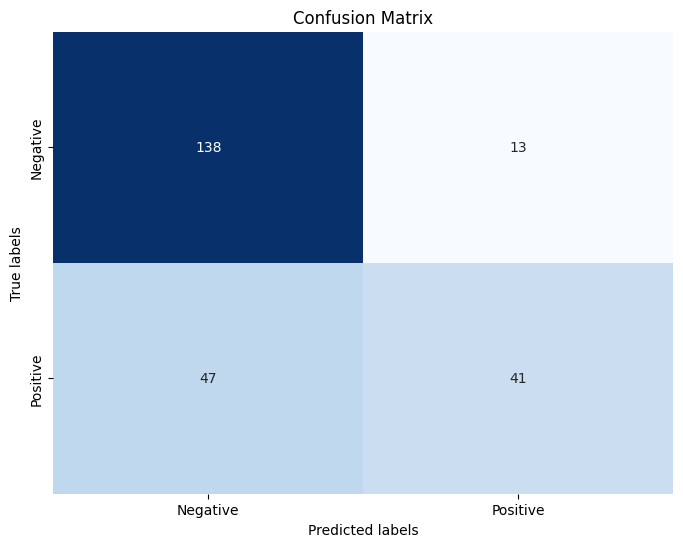

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred3)
true_negative = conf_mat[0][0]  # Correctly predicted negative class
false_positive = conf_mat[0][1] # Incorrectly predicted positive class
false_negative = conf_mat[1][0] # Incorrectly predicted negative class
true_positive = conf_mat[1][1]  # Correctly predicted positive class

# Precison
Precision = true_positive/(true_positive+false_positive)
Precision
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score
target_names = ['Diabetes_Present','Diabetes_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(Y_test,Y_pred3, target_names=target_names)))

Classification Report is: 
                       precision    recall  f1-score   support

    Diabetes_Present       0.79      0.92      0.85       151
Diabetes_Not_Present       0.81      0.59      0.68        88

            accuracy                           0.80       239
           macro avg       0.80      0.76      0.77       239
        weighted avg       0.80      0.80      0.79       239



RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

Confusion Matrix:
[[141  10]
 [ 15  73]]


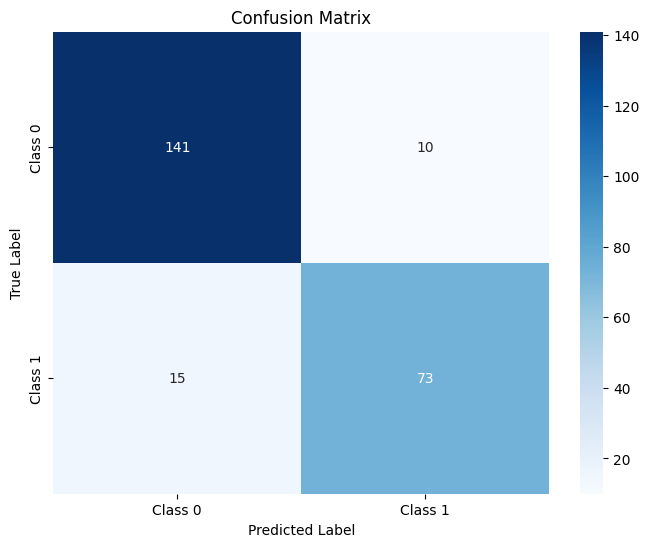

In [ ]:
Y_pred4 = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred4)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred4)
true_negative = conf_mat[0][0]  # Correctly predicted negative class
false_positive = conf_mat[0][1] # Incorrectly predicted positive class
false_negative = conf_mat[1][0] # Incorrectly predicted negative class
true_positive = conf_mat[1][1]  # Correctly predicted positive class

# Precison
Precision = true_positive/(true_positive+false_positive)
Precision
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score
target_names = ['Diabetes_Present','Diabetes_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(Y_test,Y_pred4, target_names=target_names)))

Classification Report is: 
                       precision    recall  f1-score   support

    Diabetes_Present       0.90      0.93      0.92       151
Diabetes_Not_Present       0.88      0.83      0.85        88

            accuracy                           0.90       239
           macro avg       0.89      0.88      0.89       239
        weighted avg       0.89      0.90      0.89       239



Accuracy plot for all Models

In [ ]:
import pandas as pd

accuracy_scores = {'Models': ['LR', 'SVC', 'KNN', 'RF'],
                   'Accuracy': [accuracy_score(Y_test, Y_pred1),
                 accuracy_score(Y_test, Y_pred2),
                 accuracy_score(Y_test, Y_pred3),
                 accuracy_score(Y_test, Y_pred4)]
}
# Create DataFrame
final_data = pd.DataFrame(accuracy_scores)

# Print DataFrame
print(final_data)


  Models  Accuracy
0     LR  0.736402
1    SVC  0.748954
2    KNN  0.799163
3     RF  0.895397


Training the Model

In [ ]:
# Import the necessary module
from sklearn.svm import SVC

# Create an instance of the SVC classifier
classifier = SVC(kernel='linear') # You can choose different kernels based on your needs

# Train the classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier # Import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Create individual classifiers
svc_classifier = SVC(kernel='linear', probability=True)
lg_classifier = LogisticRegression()  # Create an instance with a different name
rf_classifier = RandomForestClassifier() # Create an instance with a different name

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('svc', svc_classifier),
    ('lg', lg_classifier),  # Use the instance here
    ('rf', rf_classifier) # Use the instance here
], voting='soft')  # Use 'soft' voting to average probabilities

# Train the Voting Classifier
voting_classifier.fit(X_train, Y_train)

# Make predictions and evaluate
Y_pred = voting_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Voting Classifier Accuracy: {accuracy:.2f}')

Voting Classifier Accuracy: 0.85


Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7735849056603774


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7280334728033473


Making a Predictive System

In [ ]:
input_data = (5,266,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [ ]:
input_data = (1, 85.0, 70.0, 20.0, 80.0, 22.0, 0.2, 30)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


In [ ]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
